Creazione di una rete neurale artificiale nelle due modalità offerte dal
framework TensorFlow

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras import utils

from IPython.display import Image 

plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 300

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

print(train_images.shape)
print(train_labels.shape)
print()
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


In [3]:
print(train_images[1])
print()
print(train_labels[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

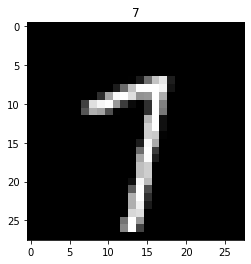

In [4]:
plt.title(train_labels[42])
plt.imshow(train_images[42], cmap="gray")
plt.show()

In [5]:
# pre-processing dei dataset

# normalizzazione
# 
# x_norm = (x - x_min) / (x_max - x_min)
#
train_images = ((train_images - 0) / (255 - 0))
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [6]:
print(train_labels[42])

# trasformazione delle label tramite hot-encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# esempio di codifica one-hot su un esempio di addestramento:
print(train_labels[42])


7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
# creazione del modello tramite le Sequential API

model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)))
model_seq.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax'))

model_seq.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_seq.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2023-02-27 20:52:57.670495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-27 20:52:57.671256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


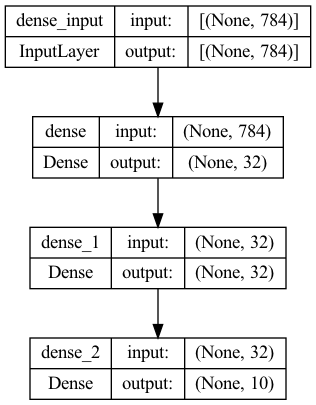

In [10]:
utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)
# Image('model_seq.png')

In [11]:
# creazione del modello tramite le Functional API

'''
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)))
model_seq.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax'))

'''


inputs = tf.keras.layers.Input(shape=(784,))
dense_1 = tf.keras.layers.Dense(32, activation='sigmoid')(inputs)
dense_2 = tf.keras.layers.Dense(32, activation='sigmoid')(dense_1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dense_2)

model_func = tf.keras.models.Model(
    inputs=inputs,
    outputs=outputs
)

model_func.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


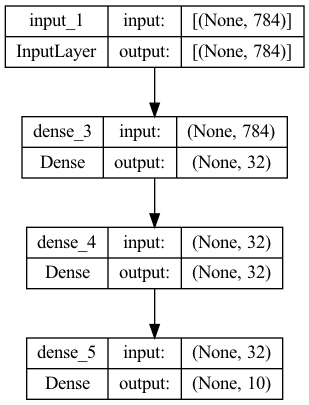

In [12]:
utils.plot_model(model_func, show_shapes=True, show_layer_names=True)
# Image('model_func.png')

In [13]:
time_start = datetime.now()
history_seq = model_seq.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    verbose=2,
)
time_sequential = datetime.now() - time_start

print('\n')

time_start = datetime.now()
history_func = model_func.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    verbose=2
)
time_functional = datetime.now() - time_start

Epoch 1/10


2023-02-27 21:07:52.155772: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-27 21:07:52.359826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-27 21:08:01.767668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 - 11s - loss: 0.7696 - accuracy: 0.8209 - val_loss: 0.3190 - val_accuracy: 0.9125 - 11s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 11s - loss: 0.2681 - accuracy: 0.9249 - val_loss: 0.2226 - val_accuracy: 0.9341 - 11s/epoch - 6ms/step
Epoch 3/10
1875/1875 - 11s - loss: 0.1957 - accuracy: 0.9442 - val_loss: 0.1809 - val_accuracy: 0.9460 - 11s/epoch - 6ms/step
Epoch 4/10
1875/1875 - 11s - loss: 0.1589 - accuracy: 0.9545 - val_loss: 0.1508 - val_accuracy: 0.9547 - 11s/epoch - 6ms/step
Epoch 5/10
1875/1875 - 11s - loss: 0.1355 - accuracy: 0.9609 - val_loss: 0.1413 - val_accuracy: 0.9577 - 11s/epoch - 6ms/step
Epoch 6/10
1875/1875 - 11s - loss: 0.1197 - accuracy: 0.9650 - val_loss: 0.1298 - val_accuracy: 0.9613 - 11s/epoch - 6ms/step
Epoch 7/10
1875/1875 - 11s - loss: 0.1076 - accuracy: 0.9680 - val_loss: 0.1242 - val_accuracy: 0.9640 - 11s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 11s - loss: 0.0980 - accuracy: 0.9709 - val_loss: 0.1237 - val_accuracy: 0.9628 - 11s/epoch - 6ms/step
Epo

2023-02-27 21:09:40.403723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-27 21:09:49.714709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 - 11s - loss: 0.7713 - accuracy: 0.8202 - val_loss: 0.3237 - val_accuracy: 0.9105 - 11s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 11s - loss: 0.2653 - accuracy: 0.9258 - val_loss: 0.2197 - val_accuracy: 0.9358 - 11s/epoch - 6ms/step
Epoch 3/10
1875/1875 - 11s - loss: 0.1921 - accuracy: 0.9453 - val_loss: 0.1748 - val_accuracy: 0.9494 - 11s/epoch - 6ms/step
Epoch 4/10
1875/1875 - 10s - loss: 0.1556 - accuracy: 0.9549 - val_loss: 0.1541 - val_accuracy: 0.9547 - 10s/epoch - 6ms/step
Epoch 5/10
1875/1875 - 11s - loss: 0.1332 - accuracy: 0.9619 - val_loss: 0.1420 - val_accuracy: 0.9590 - 11s/epoch - 6ms/step
Epoch 6/10
1875/1875 - 11s - loss: 0.1174 - accuracy: 0.9667 - val_loss: 0.1297 - val_accuracy: 0.9608 - 11s/epoch - 6ms/step
Epoch 7/10
1875/1875 - 11s - loss: 0.1051 - accuracy: 0.9695 - val_loss: 0.1275 - val_accuracy: 0.9612 - 11s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 11s - loss: 0.0955 - accuracy: 0.9724 - val_loss: 0.1202 - val_accuracy: 0.9634 - 11s/epoch - 6ms/step
Epo

In [14]:
print('\t Sequential\t Functional')
print('Layers\t', len(model_seq.layers), '\t\t', len(model_func.layers))
print('Params\t', model_seq.count_params(), '\t\t', model_func.count_params())
print('Time\t', time_sequential.seconds, '\t\t', time_functional.seconds)
print('Acc\t', int(history_seq.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_func.history['val_accuracy'][-1] * 10000) / 100)
print('Loss\t', str(history_seq.history['val_loss'][-1])[:5], '\t\t', str(history_func.history['val_loss'][-1])[:5])

	 Sequential	 Functional
Layers	 3 		 4
Params	 26506 		 26506
Time	 108 		 106
Acc	 96.36 		 96.33
Loss	 0.121 		 0.117


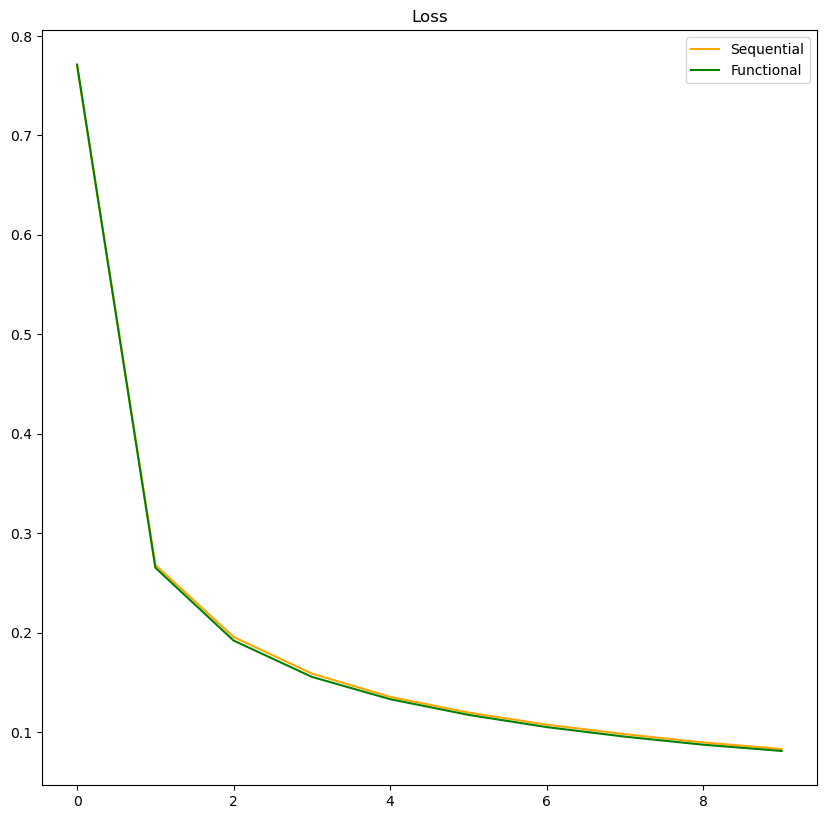

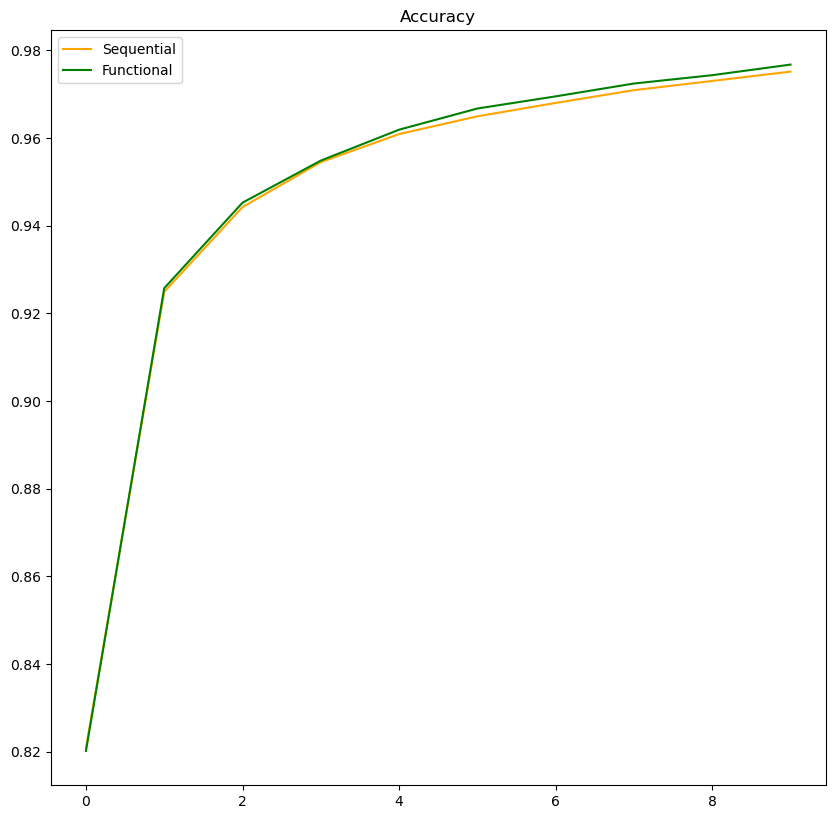

In [16]:
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 100

# visualizzazione su grafico
# dell'andamento dell'addestramento
# dei modelli

# errore modello
plt.plot(history_seq.history['loss'], color='orange', label='Sequential')
plt.plot(history_func.history['loss'], color='green', label='Functional')
plt.title('Loss')
plt.legend()
plt.show()

# accuratezza modello
plt.plot(history_seq.history['accuracy'], color='orange', label='Sequential')
plt.plot(history_func.history['accuracy'], color='green', label='Functional')
plt.title('Accuracy')
plt.legend()
plt.show()

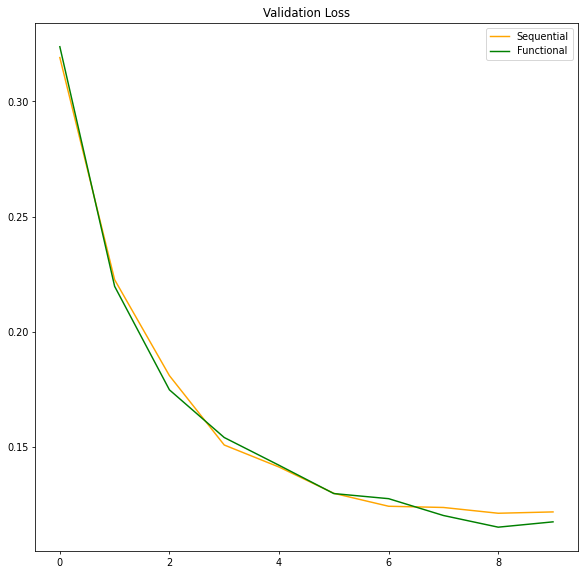

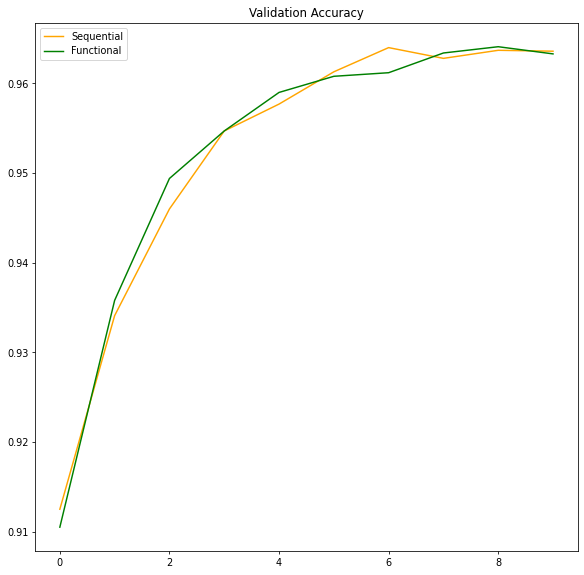

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 70

# visualizzazione su grafico
# delle performance dei modelli
# durante l'addestramento

# errore modello
plt.plot(history_seq.history['val_loss'], color='orange', label='Sequential')
plt.plot(history_func.history['val_loss'], color='green', label='Functional')
plt.title('Validation Loss')
plt.legend()
plt.show()

# accuratezza modello
plt.plot(history_seq.history['val_accuracy'], color='orange', label='Sequential')
plt.plot(history_func.history['val_accuracy'], color='green', label='Functional')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

In [19]:
# creazione del modello concatenato tramite le Functional API

inputs = tf.keras.layers.Input(shape=(784,))
dense = tf.keras.layers.Dense(16, activation='sigmoid')(inputs)
dense_1 = tf.keras.layers.Dense(16, activation='sigmoid')(inputs)

merged = tf.keras.layers.Concatenate(axis=1, name="merger")([dense, dense_1])
dense_2 = tf.keras.layers.Dense(32, activation='sigmoid')(merged)

outputs = tf.keras.layers.Dense(10, activation='softmax')(dense_2)

model_parallel = tf.keras.models.Model(
    inputs=inputs,
    outputs=outputs
)

model_parallel.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_parallel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 16)           12560       ['input_2[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 16)           12560       ['input_2[0][0]']                
                                                                                                  
 merger (Concatenate)           (None, 32)           0           ['dense_6[0][0]',                
                                                                  'dense_7[0][0]']          

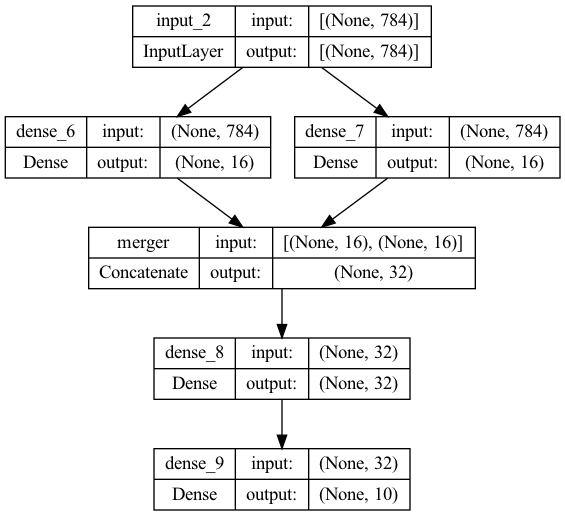

In [20]:
utils.plot_model(
    model_parallel, 
    show_shapes=True
)

In [21]:
time_start = datetime.now()
history_parallel = model_parallel.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    verbose=2
)
time_parallel = datetime.now() - time_start

Epoch 1/10


2023-02-27 21:18:11.155644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-27 21:18:21.076816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 - 12s - loss: 0.7695 - accuracy: 0.8223 - val_loss: 0.3315 - val_accuracy: 0.9079 - 12s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 11s - loss: 0.2717 - accuracy: 0.9241 - val_loss: 0.2225 - val_accuracy: 0.9372 - 11s/epoch - 6ms/step
Epoch 3/10
1875/1875 - 11s - loss: 0.1990 - accuracy: 0.9437 - val_loss: 0.1812 - val_accuracy: 0.9467 - 11s/epoch - 6ms/step
Epoch 4/10
1875/1875 - 11s - loss: 0.1612 - accuracy: 0.9542 - val_loss: 0.1543 - val_accuracy: 0.9525 - 11s/epoch - 6ms/step
Epoch 5/10
1875/1875 - 12s - loss: 0.1375 - accuracy: 0.9601 - val_loss: 0.1390 - val_accuracy: 0.9585 - 12s/epoch - 6ms/step
Epoch 6/10
1875/1875 - 12s - loss: 0.1199 - accuracy: 0.9651 - val_loss: 0.1281 - val_accuracy: 0.9608 - 12s/epoch - 7ms/step
Epoch 7/10
1875/1875 - 12s - loss: 0.1071 - accuracy: 0.9689 - val_loss: 0.1224 - val_accuracy: 0.9637 - 12s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 12s - loss: 0.0973 - accuracy: 0.9718 - val_loss: 0.1201 - val_accuracy: 0.9645 - 12s/epoch - 6ms/step
Epo

In [22]:
print('\t Sequential\t Functional\tParallel')
print('Layers\t', len(model_seq.layers), '\t\t', len(model_func.layers), '\t\t', len(model_parallel.layers))
print('Params\t', model_seq.count_params(), '\t\t', model_func.count_params(), '\t\t', model_parallel.count_params())
print('Time\t', time_sequential.seconds, '\t\t', time_functional.seconds, '\t\t', time_parallel.seconds)
print('Acc\t', int(history_seq.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_func.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_parallel.history['val_accuracy'][-1] * 10000) / 100)
print('Loss\t', str(history_seq.history['val_loss'][-1])[:5], '\t\t', str(history_func.history['val_loss'][-1])[:5], '\t\t',  str(history_parallel.history['val_loss'][-1])[:5])




	 Sequential	 Functional	Parallel
Layers	 3 		 4 		 6
Params	 26506 		 26506 		 26506
Time	 108 		 106 		 117
Acc	 96.36 		 96.33 		 96.68
Loss	 0.121 		 0.117 		 0.110


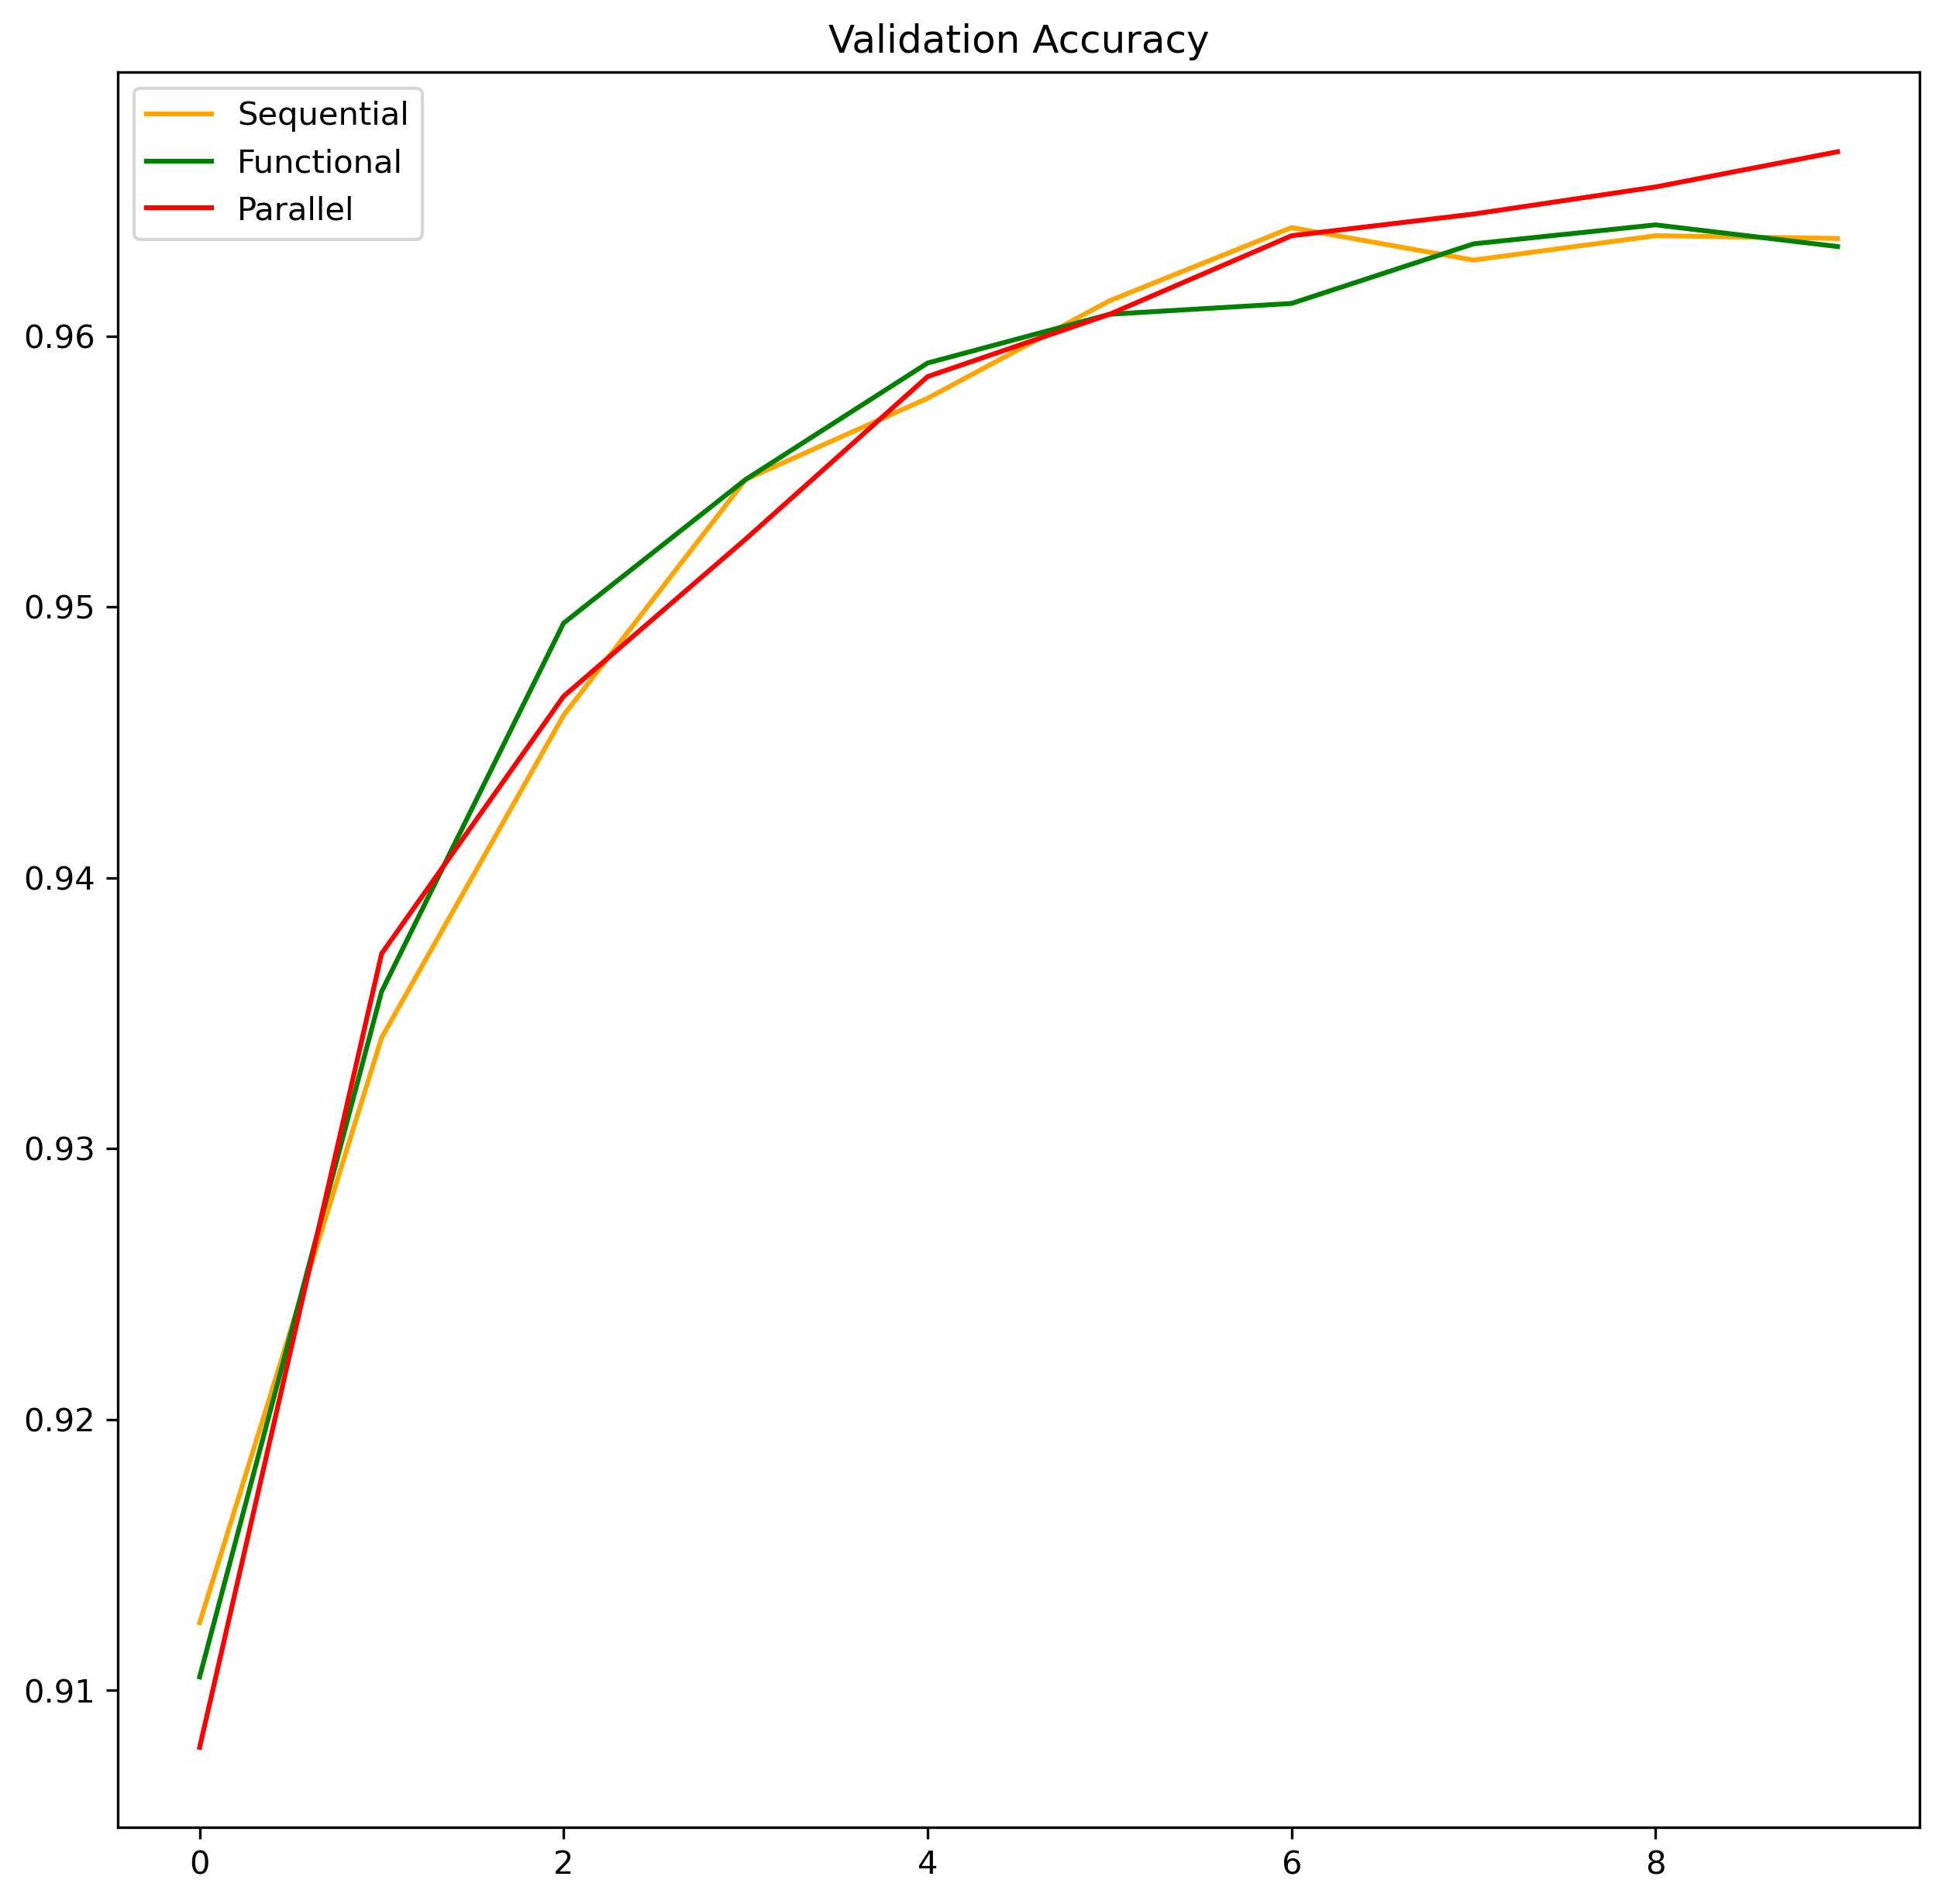

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 300

plt.plot(history_seq.history['val_accuracy'], color='orange', label='Sequential')
plt.plot(history_func.history['val_accuracy'], color='green', label='Functional')
plt.plot(history_parallel.history['val_accuracy'], color='red', label='Parallel')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

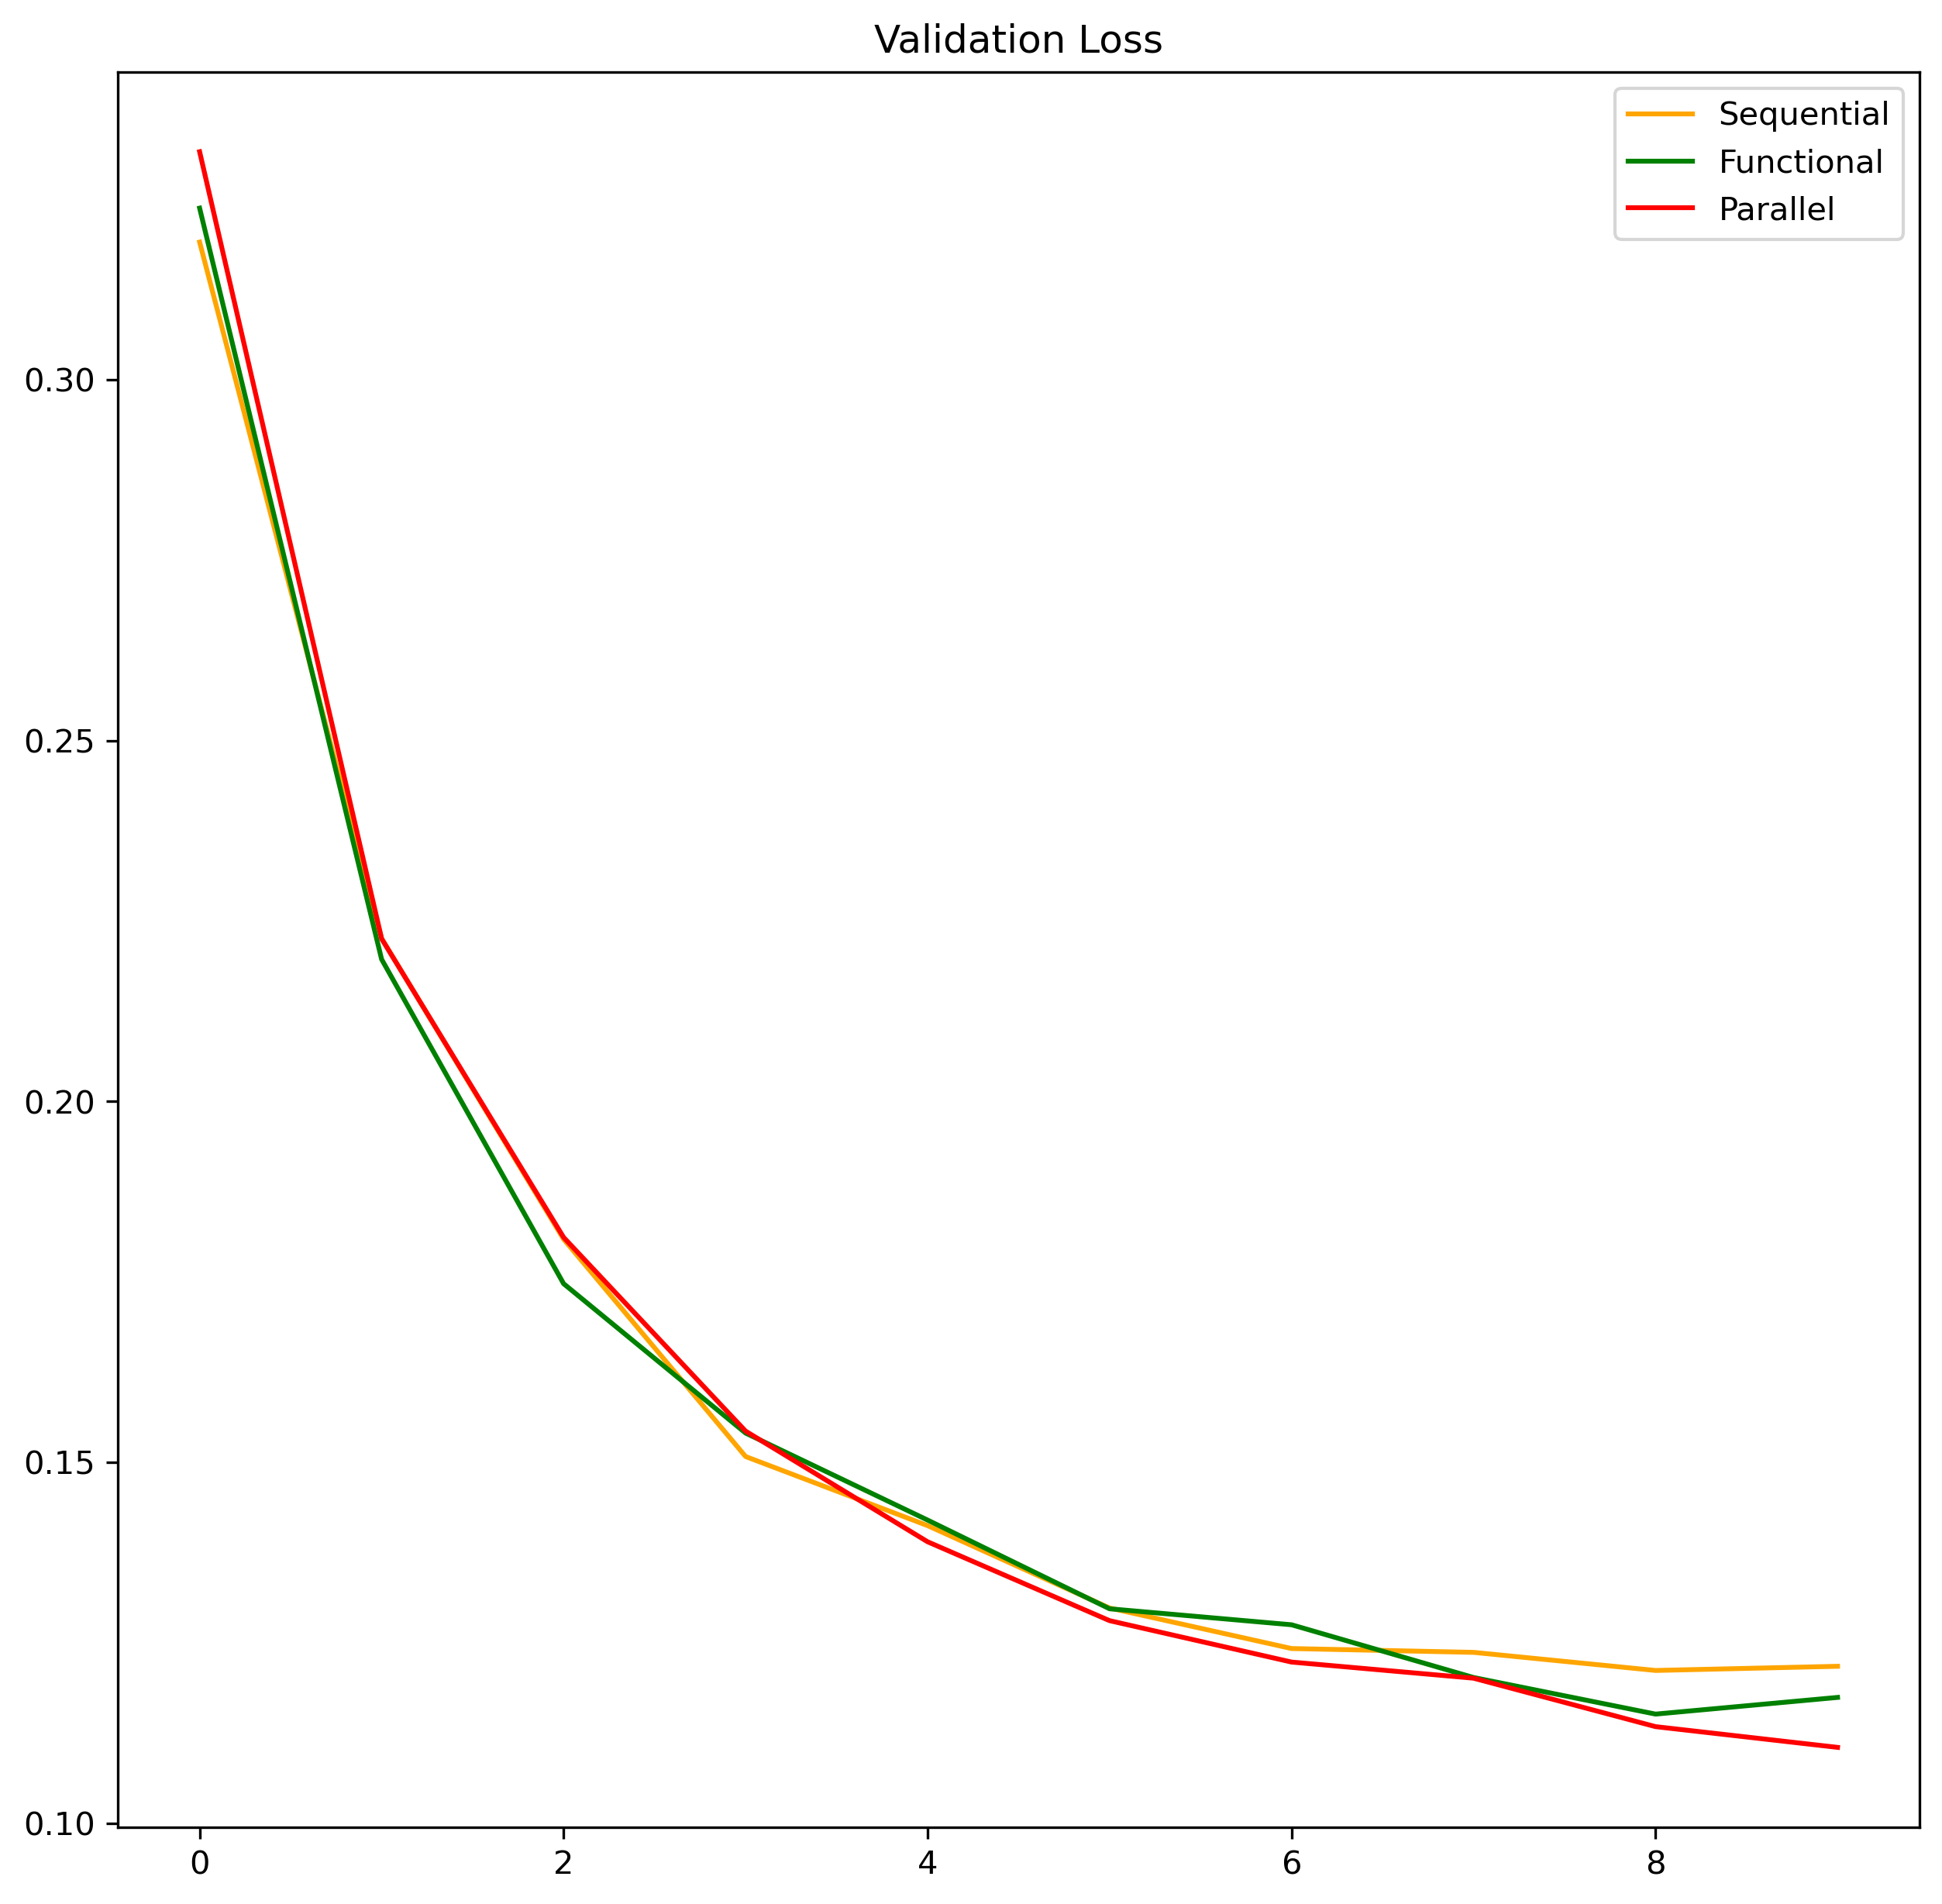

In [24]:
# errore modello
plt.plot(history_seq.history['val_loss'], color='orange', label='Sequential')
plt.plot(history_func.history['val_loss'], color='green', label='Functional')
plt.plot(history_parallel.history['val_loss'], color='red', label='Parallel')

plt.title('Validation Loss')
plt.legend()
plt.show()